<a href="https://colab.research.google.com/github/MudassirABBASSi/Age-Prediction/blob/main/Deep_learning_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train ,y_train),(x_test , y_test)  = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:


def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

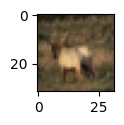

In [6]:
plot_sample(3)

In [21]:
def plot_sample(index):
 plt.figure(figsize=(10,1))
 plt.imshow(x_train[index])
 plt.show() # added plt.show()

# plot_sample(3)

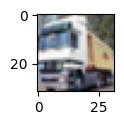

In [29]:
plot_sample(1)

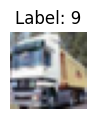

In [32]:


def plot_label(index):
    plt.figure(figsize=(10,1))
    plt.title(f"Label: {y_train[index][0]}")  # Access the label value and show it as title.
    plt.axis('off') # Hide axes for cleaner view.
    plt.imshow(x_train[index]) # display the image
    plt.show() # show the plot

plot_label(1)


# Scaling the Dataset

In [33]:
x_train_scaled =x_train /255
x_test_scaled = x_test /255

In [34]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [35]:
x_test.shape

(10000, 32, 32, 3)

# One Hot Encoading on Target Values
because we have image on target as we have scale the X values therefore we have to Encode the Target column

In [36]:
y_train_categorical = keras.utils.to_categorical(y_train , num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test , num_classes=10)

# # One Hot Encoding on Target Values
# y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
# y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)

In [37]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Neural Network
without Hidden Leyers

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),  #converting the Multidimension Array in to Single Array
    keras.layers.Dense(10,input_shape = (32,32,3,),activation='sigmoid')

])
model.compile(
    optimizer ='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2823 - loss: 2.0494
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3467 - loss: 1.8852
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3608 - loss: 1.8576
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3677 - loss: 1.8377
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3688 - loss: 1.8287


Single Hidden Layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
     keras.layers.Dense(10000, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

    ])


model.compile(
    optimizer ='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs=5)


Epoch 1/5
 254/1563 ━━━━━━━━━━━━━━━━━━━━ 14:02 644ms/step - accuracy: 0.1897 - loss: 5.8870

Number of hidden Layer is small in number

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(100,input_shape = (32,32,3,),activation = 'relu'),
    keras.layers.Dense(200,input_shape = (32,32,3,),activation = 'relu'),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')

])
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']

)
model.fit(x_train_scaled,y_train_categorical,epochs = 5)

With two Hidden Layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
  #  keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    # matrics = ['accuracy']
     metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs = 5)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    # matrics = ['accuracy']
     metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs = 5)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(600,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(1000,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    # matrics = ['accuracy']
     metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs = 5)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(600,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(300,input_shape = (32,32,3,),activation  = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    # matrics = ['accuracy']
     metrics = ['accuracy']
)
model.fit(x_train_scaled,y_train_categorical,epochs = 5)

In [ ]:
import tensorflow as tf
import datetime

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

# Start TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/fit
